# Attic treasures: Creating a model 

## import modules 

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from joblib import dump, load

## load the pickle:

In [47]:
greatest_df = pd.read_pickle("Data/greatest_df_decade.pkl")

In [48]:
greatest_df.head()

,song titles,artists,songs uri,song id,release year,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,D.A.N.C.E,Justice,spotify:track:33yAEqzKXexYM3WlOYtTfQ,33yAEqzKXexYM3WlOYtTfQ,2007,0.613,0.962,6,-5.070,0,...,0.8240,0.496,113.015,audio_features,33yAEqzKXexYM3WlOYtTfQ,spotify:track:33yAEqzKXexYM3WlOYtTfQ,https://api.spotify.com/v1/tracks/33yAEqzKXexY...,https://api.spotify.com/v1/audio-analysis/33yA...,242267,4
1,"White & Nerdy (Parody of ""Ridin'"" by Chamillio...","""Weird Al"" Yankovic",spotify:track:60R2v9lheAu3lwZwAFxMZK,60R2v9lheAu3lwZwAFxMZK,2006,0.791,0.613,1,-11.628,0,...,0.0765,0.896,143.017,audio_features,60R2v9lheAu3lwZwAFxMZK,spotify:track:60R2v9lheAu3lwZwAFxMZK,https://api.spotify.com/v1/tracks/60R2v9lheAu3...,https://api.spotify.com/v1/audio-analysis/60R2...,170640,4
2,Goliath,Smith & Thell,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,0z4kyKuFGmUV7WQ7gB1sAp,2020,0.528,0.833,9,-6.190,1,...,0.0680,0.460,127.998,audio_features,0z4kyKuFGmUV7WQ7gB1sAp,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,https://api.spotify.com/v1/tracks/0z4kyKuFGmUV...,https://api.spotify.com/v1/audio-analysis/0z4k...,204759,4
3,L'Empordà,Sopa De Cabra,spotify:track:1vzugDTXDgZCF0QQrzB5hX,1vzugDTXDgZCF0QQrzB5hX,2010,0.681,0.837,4,-8.907,1,...,0.0986,0.959,143.472,audio_features,1vzugDTXDgZCF0QQrzB5hX,spotify:track:1vzugDTXDgZCF0QQrzB5hX,https://api.spotify.com/v1/tracks/1vzugDTXDgZC...,https://api.spotify.com/v1/audio-analysis/1vzu...,159333,4
4,House of the Rising Sun,The Animals,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,4mn2kNTqiGLwaUR8JdhJ1l,1987,0.316,0.484,9,-9.110,0,...,0.0912,0.299,117.363,audio_features,4mn2kNTqiGLwaUR8JdhJ1l,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,https://api.spotify.com/v1/tracks/4mn2kNTqiGLw...,https://api.spotify.com/v1/audio-analysis/4mn2...,269907,3


In [49]:
# drop anything is not features. I don't want to cluster by identifier similarity...

In [51]:
greatest_clustering_df=greatest_df.drop(columns=["song titles", 
                "artists",
                "release year",
                "songs uri", 
                "song id",
                "type",
                "id",
                "uri",
                "track_href",                
                "analysis_url",
                "duration_ms",
                "time_signature"])

In [52]:
greatest_clustering_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.613,0.962,6,-5.070,0,0.2780,0.034000,0.000000,0.8240,0.496,113.015
1,0.791,0.613,1,-11.628,0,0.0763,0.098600,0.000000,0.0765,0.896,143.017
2,0.528,0.833,9,-6.190,1,0.0514,0.000414,0.000001,0.0680,0.460,127.998
3,0.681,0.837,4,-8.907,1,0.0410,0.036200,0.000002,0.0986,0.959,143.472
4,0.316,0.484,9,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.299,117.363


In [53]:
greatest_clustering_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000
mean,0.515244,0.513645,5.174180,-10.932464,0.638553,0.066798,0.435735,0.219548,0.180067,0.435271,116.417039
std,0.192688,0.287194,3.558698,6.817467,0.480435,0.072402,0.384152,0.351081,0.154168,0.271865,29.906196
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379000,0.255000,2.000000,-14.365000,0.000000,0.034800,0.049700,0.000001,0.094150,0.194000,93.999000
50%,0.532000,0.550000,5.000000,-8.732000,1.000000,0.043000,0.332000,0.001020,0.119000,0.416000,115.995000
75%,0.659000,0.762000,8.000000,-5.916000,1.000000,0.061800,0.867000,0.381500,0.206000,0.655000,134.974500
max,0.980000,1.000000,11.000000,-0.475000,1.000000,0.963000,0.996000,0.996000,0.997000,0.991000,239.964000


In [54]:
# scaler part:

In [55]:
# initialize the transformer
scaler =StandardScaler()

In [56]:
#fit and transfrom the data
greatest_scaled=scaler.fit_transform(greatest_clustering_df)

In [57]:
# initialize the model
#create and object
#we have not passed the data yet.
#try with 5 clusters, later I will test other possibilities
Five_kmeans=KMeans(n_clusters=5, random_state=1234)

In [58]:
# fit the model
#we are storing inside of the object our fitted data:
Five_kmeans.fit(greatest_scaled)

KMeans(n_clusters=5, random_state=1234)

In [59]:
# predict and show me
Five_kmeans.predict(greatest_scaled)

array([0, 1, 4, ..., 2, 2, 2], dtype=int32)

In [60]:
# Predicting / assigning the clusters
# and store it in an array called "clusters":
clusters=Five_kmeans.predict(greatest_scaled)

In [64]:
# make the pd.Series "clusters" a column of the original table
greatest_df["clusters"]=clusters

In [71]:
#see the number of clusters and the number of elements in that cluster
greatest_df["clusters"].value_counts().sort_index()

0     831
1    3338
2    2946
3    2846
4    5322
Name: clusters, dtype: int64

In [72]:
# make the pd.Series "clusters" a column of the original table
greatest_df["clusters"]=clusters

In [73]:
# make the pd.Series "clusters" a column of the original dropped table:
greatest_clustering_df["clusters"]=clusters

In [74]:
greatest_df.head()

,song titles,artists,songs uri,song id,release year,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,D.A.N.C.E,Justice,spotify:track:33yAEqzKXexYM3WlOYtTfQ,33yAEqzKXexYM3WlOYtTfQ,2007,0.613,0.962,6,-5.070,0,...,0.496,113.015,audio_features,33yAEqzKXexYM3WlOYtTfQ,spotify:track:33yAEqzKXexYM3WlOYtTfQ,https://api.spotify.com/v1/tracks/33yAEqzKXexY...,https://api.spotify.com/v1/audio-analysis/33yA...,242267,4,0
1,"White & Nerdy (Parody of ""Ridin'"" by Chamillio...","""Weird Al"" Yankovic",spotify:track:60R2v9lheAu3lwZwAFxMZK,60R2v9lheAu3lwZwAFxMZK,2006,0.791,0.613,1,-11.628,0,...,0.896,143.017,audio_features,60R2v9lheAu3lwZwAFxMZK,spotify:track:60R2v9lheAu3lwZwAFxMZK,https://api.spotify.com/v1/tracks/60R2v9lheAu3...,https://api.spotify.com/v1/audio-analysis/60R2...,170640,4,1
2,Goliath,Smith & Thell,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,0z4kyKuFGmUV7WQ7gB1sAp,2020,0.528,0.833,9,-6.190,1,...,0.460,127.998,audio_features,0z4kyKuFGmUV7WQ7gB1sAp,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,https://api.spotify.com/v1/tracks/0z4kyKuFGmUV...,https://api.spotify.com/v1/audio-analysis/0z4k...,204759,4,4
3,L'Empordà,Sopa De Cabra,spotify:track:1vzugDTXDgZCF0QQrzB5hX,1vzugDTXDgZCF0QQrzB5hX,2010,0.681,0.837,4,-8.907,1,...,0.959,143.472,audio_features,1vzugDTXDgZCF0QQrzB5hX,spotify:track:1vzugDTXDgZCF0QQrzB5hX,https://api.spotify.com/v1/tracks/1vzugDTXDgZC...,https://api.spotify.com/v1/audio-analysis/1vzu...,159333,4,4
4,House of the Rising Sun,The Animals,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,4mn2kNTqiGLwaUR8JdhJ1l,1987,0.316,0.484,9,-9.110,0,...,0.299,117.363,audio_features,4mn2kNTqiGLwaUR8JdhJ1l,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,https://api.spotify.com/v1/tracks/4mn2kNTqiGLw...,https://api.spotify.com/v1/audio-analysis/4mn2...,269907,3,1


In [75]:
greatest_clustering_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
count,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000,15283.000000
mean,0.515244,0.513645,5.174180,-10.932464,0.638553,0.066798,0.435735,0.219548,0.180067,0.435271,116.417039,2.555519
std,0.192688,0.287194,3.558698,6.817467,0.480435,0.072402,0.384152,0.351081,0.154168,0.271865,29.906196,1.306354
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379000,0.255000,2.000000,-14.365000,0.000000,0.034800,0.049700,0.000001,0.094150,0.194000,93.999000,1.000000
50%,0.532000,0.550000,5.000000,-8.732000,1.000000,0.043000,0.332000,0.001020,0.119000,0.416000,115.995000,3.000000
75%,0.659000,0.762000,8.000000,-5.916000,1.000000,0.061800,0.867000,0.381500,0.206000,0.655000,134.974500,4.000000
max,0.980000,1.000000,11.000000,-0.475000,1.000000,0.963000,0.996000,0.996000,0.997000,0.991000,239.964000,4.000000


In [76]:
greatest_df.groupby("clusters").describe()

danceability                                                      \
                count      mean       std    min      25%    50%      75%   
clusters                                                                    
0               831.0  0.659091  0.162012  0.154  0.54500  0.663  0.79150   
1              3338.0  0.612329  0.147066  0.156  0.51725  0.623  0.71600   
2              2946.0  0.295913  0.142051  0.000  0.18400  0.279  0.39200   
3              2846.0  0.445097  0.155377  0.000  0.32500  0.440  0.56075   
4              5322.0  0.590814  0.144144  0.104  0.49300  0.596  0.69200   

                 energy            ... duration_ms            time_signature  \
            max   count      mean  ...         75%        max          count   
clusters                           ...                                         
0         0.980   831.0  0.663247  ...   257801.50   962894.0          831.0   
1         0.971  3338.0  0.687995  ...   268545.00  1262400.0         3338.0   
2         0.862  2946.0  0.147851  ...   327804.50  1886333.0         2946.0   
3         0.905  2846.0  0.269087  ...   269973.00  1163652.0         2846.0   
4         0.980  5322.0  0.714198  ...   259218.75  1967427.0         5322.0   

                                                       
              mean       std  min  25%  50%  75%  max  
clusters                                               
0         3.965102  0.380215  1.0  4.0  4.0  4.0  5.0  
1         3.949970  0.281614  1.0  4.0  4.0  4.0  5.0  
2         3.635777  0.796467  0.0  3.0  4.0  4.0  5.0  
3         3.770204  0.620027  0.0  4.0  4.0  4.0  5.0  
4         3.950395  0.273803  1.0  4.0  4.0  4.0  5.0  

[5 rows x 104 columns]

In [77]:
greatest_clustering_df.groupby("clusters").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
clusters,,,,,,,,,,,
0,0.659091,0.663247,5.416366,-7.598751,0.588448,0.316303,0.234923,0.031765,0.229107,0.559675,122.433215
1,0.612329,0.687995,5.952966,-7.184392,0.000000,0.062167,0.199298,0.101699,0.189064,0.546616,121.305734
2,0.295913,0.147851,5.048880,-21.021084,0.604549,0.043772,0.897698,0.782169,0.136535,0.163737,102.084228
3,0.445097,0.269087,4.993675,-13.538954,0.761420,0.044689,0.791343,0.070321,0.164315,0.300492,111.676767
4,0.590814,0.714198,4.813792,-6.825406,1.000000,0.055312,0.169500,0.091146,0.199288,0.568393,122.880280


## choose number of clusters:

In [82]:

# calculate silhouette score
K = range(2, 30)
silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(greatest_scaled)
    silhouette.append(silhouette_score(greatest_scaled, kmeans.predict(greatest_scaled)))
silhouette

[0.27618470575810283,
 0.18789111729610225,
 0.19102324365919535,
 0.16400998955835544,
 0.17020512394986376,
 0.15031719533018945,
 0.14484833766866326,
 0.15013611824710307,
 0.14642170348165778,
 0.14435199787434322,
 0.14256868354306987,
 0.1389926347851516,
 0.13734358461560794,
 0.13344173206894233,
 0.13740737296849276,
 0.1371131935355624,
 0.12974610242780754,
 0.13045429902762834,
 0.13748588197293374,
 0.13011069652616516,
 0.1281950925796156,
 0.12705834718200068,
 0.1316697802168909,
 0.1275308621900008,
 0.12738583883519639,
 0.12569630454277872,
 0.1314622090958946,
 0.12934383627759316]

In [83]:
#kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(greatest_scaled)
#                for k in range(1, 10)]
#inertias = [model.inertia_ for model in kmeans_per_k]

Text(0.5, 1.0, 'Elbow Method showing the silhouette score')

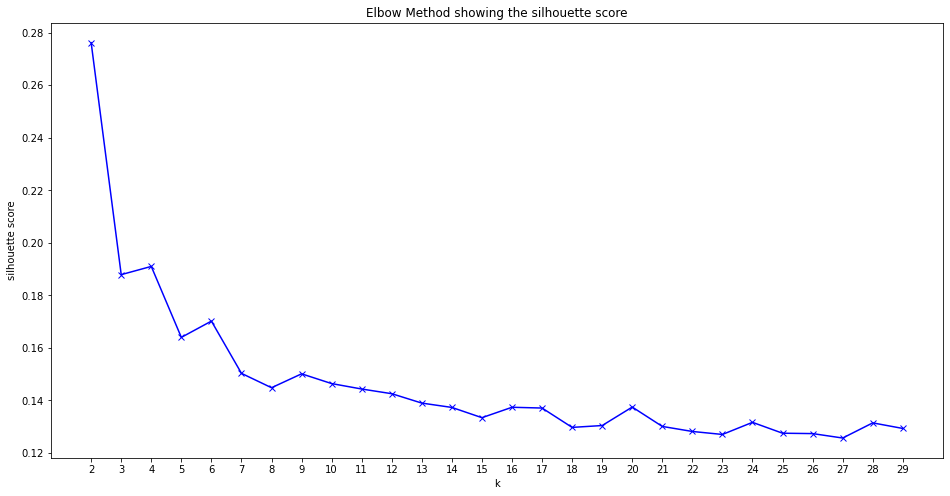

In [84]:
# plot
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the silhouette score')

In [85]:
#Try with 18 clusters



In [86]:
# initialize the model
#create and object
#we have not passed the data yet.
Eighteen_kmeans=KMeans(n_clusters=18, random_state=1234)
# fit the model
#we are storing inside of the object our fitted data:
Eighteen_kmeans.fit(greatest_scaled)
# Predicting / assigning the clusters
# and store it in an array called "clusters":
clusters=Eighteen_kmeans.predict(greatest_scaled)
#go from array to pd.Series:

clusters=pd.Series(clusters)
#see the number of clusters and the number of elements in that cluster
clusters.value_counts().sort_index()

0      995
1      690
2     1069
3      959
4      925
5      745
6      162
7     1259
8      688
9      654
10     741
11     930
12     619
13     818
14    1110
15    1011
16     834
17    1074
dtype: int64

In [87]:
#go from array to pd.Series:

clusters=pd.Series(clusters)
# make the pd.Series "clusters" a column of the original dropped table:
greatest_clustering_df["clusters"]=clusters
greatest_df.head()

,song titles,artists,songs uri,song id,release year,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,D.A.N.C.E,Justice,spotify:track:33yAEqzKXexYM3WlOYtTfQ,33yAEqzKXexYM3WlOYtTfQ,2007,0.613,0.962,6,-5.070,0,...,0.496,113.015,audio_features,33yAEqzKXexYM3WlOYtTfQ,spotify:track:33yAEqzKXexYM3WlOYtTfQ,https://api.spotify.com/v1/tracks/33yAEqzKXexY...,https://api.spotify.com/v1/audio-analysis/33yA...,242267,4,0
1,"White & Nerdy (Parody of ""Ridin'"" by Chamillio...","""Weird Al"" Yankovic",spotify:track:60R2v9lheAu3lwZwAFxMZK,60R2v9lheAu3lwZwAFxMZK,2006,0.791,0.613,1,-11.628,0,...,0.896,143.017,audio_features,60R2v9lheAu3lwZwAFxMZK,spotify:track:60R2v9lheAu3lwZwAFxMZK,https://api.spotify.com/v1/tracks/60R2v9lheAu3...,https://api.spotify.com/v1/audio-analysis/60R2...,170640,4,1
2,Goliath,Smith & Thell,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,0z4kyKuFGmUV7WQ7gB1sAp,2020,0.528,0.833,9,-6.190,1,...,0.460,127.998,audio_features,0z4kyKuFGmUV7WQ7gB1sAp,spotify:track:0z4kyKuFGmUV7WQ7gB1sAp,https://api.spotify.com/v1/tracks/0z4kyKuFGmUV...,https://api.spotify.com/v1/audio-analysis/0z4k...,204759,4,4
3,L'Empordà,Sopa De Cabra,spotify:track:1vzugDTXDgZCF0QQrzB5hX,1vzugDTXDgZCF0QQrzB5hX,2010,0.681,0.837,4,-8.907,1,...,0.959,143.472,audio_features,1vzugDTXDgZCF0QQrzB5hX,spotify:track:1vzugDTXDgZCF0QQrzB5hX,https://api.spotify.com/v1/tracks/1vzugDTXDgZC...,https://api.spotify.com/v1/audio-analysis/1vzu...,159333,4,4
4,House of the Rising Sun,The Animals,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,4mn2kNTqiGLwaUR8JdhJ1l,1987,0.316,0.484,9,-9.110,0,...,0.299,117.363,audio_features,4mn2kNTqiGLwaUR8JdhJ1l,spotify:track:4mn2kNTqiGLwaUR8JdhJ1l,https://api.spotify.com/v1/tracks/4mn2kNTqiGLw...,https://api.spotify.com/v1/audio-analysis/4mn2...,269907,3,1


## store files in pickles

In [96]:
#store the df with the five clusters info column in a pickle

#only with clustering columns
greatest_clustering_df.to_pickle("Data/clustering_df_decade_18.pkl")

#original df with all the columns plus clustering
greatest_df.to_pickle("Data/greatest_clustered_df_decade_18.pkl")



#store scaler and kmeans in pickle files:

dump(scaler,"Data/scaler_decade.joblib")

dump(Five_kmeans,"Data/kmeans_decade_18.joblib") 


['Data/kmeans_decade_18.joblib']

## Explore the spce occupied by the clusters, when there are five of them:

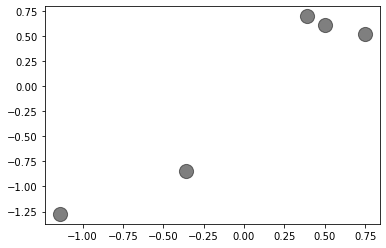

In [89]:


centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [90]:
centers

array([[ 0.74655296,  0.52092626,  0.06805671,  0.48901188, -0.10429418,
         3.44623874, -0.5227584 , -0.534887  ,  0.31810154,  0.45760953,
         0.20117481],
       [ 0.50386   ,  0.60710185,  0.21884713,  0.54979291, -1.3291556 ,
        -0.063968  , -0.61549772, -0.33568479,  0.05835903,  0.40957167,
         0.16347297],
       [-1.13911768, -1.27397526, -0.03627729, -1.47983438, -0.07107505,
        -0.31798457,  1.20289141,  1.59973431, -0.28252674, -0.99944666,
        -0.47932465],
       [-0.36199045, -0.85058425, -0.04924312, -0.3808712 ,  0.25668931,
        -0.30545429,  0.9246757 , -0.4247356 , -0.10177738, -0.4940253 ,
        -0.15767646],
       [ 0.39226947,  0.69856086, -0.10149419,  0.60265939,  0.75235736,
        -0.15858639, -0.69318532, -0.36584965,  0.12472508,  0.48965567,
         0.2160182 ]])

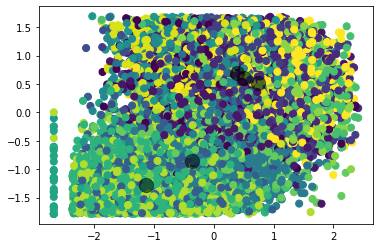

In [91]:
plt.scatter(greatest_scaled[:, 0], greatest_scaled[:, 1], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

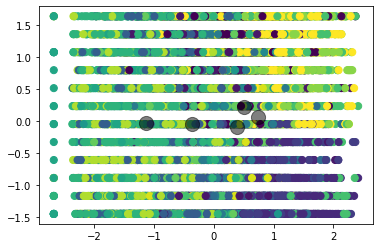

In [92]:
plt.scatter(greatest_scaled[:, 0], greatest_scaled[:, 2], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

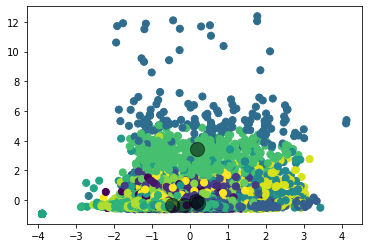

In [93]:
#separates the bright green dfrom the rest 10, 5
plt.scatter(greatest_scaled[:,10], greatest_scaled[:, 5], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 5], c='black', s=200, alpha=0.5);

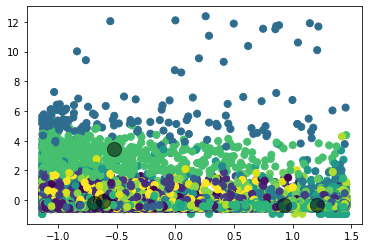

In [94]:
#separates the green dfrom the rest 6, 5
plt.scatter(greatest_scaled[:,6], greatest_scaled[:, 5], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 5], c='black', s=200, alpha=0.5);

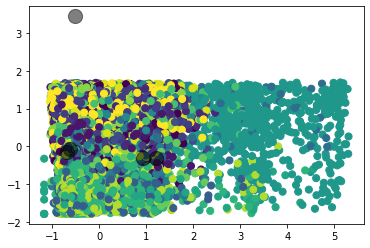

In [95]:
#separates the green dfrom the rest 6, 5
plt.scatter(greatest_scaled[:,8], greatest_scaled[:,1], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 5], c='black', s=200, alpha=0.5);

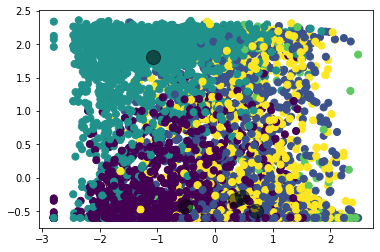

In [35]:
plt.scatter(greatest_scaled[:, 0], greatest_scaled[:, 7], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 7], c='black', s=200, alpha=0.5);

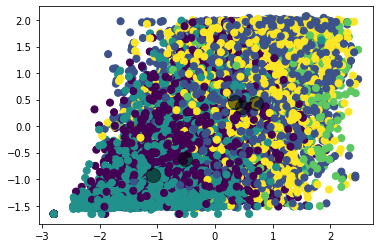

In [36]:
plt.scatter(greatest_scaled[:,0], greatest_scaled[:, 9], c=clusters, s=50, cmap='viridis')

centers = Five_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 9], c='black', s=200, alpha=0.5);

In [37]:
greatest_scaled[:,0]

array([ 0.50594728,  1.46626447,  0.04736885, ..., -0.47055502,
        0.66240345,  0.67858857])

In [38]:
greatest_scaled[:,1]

array([ 1.53754062,  0.32140728,  1.08802429, ..., -0.25355547,
        0.1715685 ,  0.47821531])

In [39]:
greatest_scaled

array([[ 0.50594728,  1.53754062,  0.2293426 , ...,  4.08438057,
         0.2103586 , -0.13220476],
       [ 1.46626447,  0.32140728, -1.17743381, ..., -0.67542192,
         1.71460098,  0.87301772],
       [ 0.04736885,  1.08802429,  1.07340844, ..., -0.72954676,
         0.07497679,  0.36980339],
       ...,
       [-0.47055502, -0.25355547,  0.79205316, ..., -0.52578264,
        -0.33116865, -1.33825732],
       [ 0.66240345,  0.1715685 ,  0.51069788, ..., -0.76393196,
         0.64282829, -1.17146852],
       [ 0.67858857,  0.47821531, -1.4587891 , ..., -0.48757687,
         0.25924648,  0.1862955 ]])

In [40]:
type(greatest_scaled)

numpy.ndarray

In [41]:
greatest_scaled.shape

(13756, 11)